# Food Production Capacity of Individual Countries
This data is being collated for use with other datasets in modelling food production capacities of individual countries and the relative capacity of these countries to participate in the global food supply as food exporters or food importers over the period 2020-2050.  The dataset is sourced from wikipedia: 'Land use statistics by country' 2011-2021.  The code uses BeautifulSoup for scraping the data table; pandas for cleaning, filtering and saving the data as a .csv and seaborn is used for visualizations.

## 1. Load libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# numpy is optional
# All warnings due to version issues with seaborn
import warnings
warnings.filterwarnings("ignore")
# Reset the warning filters to their original state if no longer needed



## 2. Import the data

In [2]:
# The wikitable is scraped using BeautifulSoup

url = "https://en.wikipedia.org/wiki/Land_use_statistics_by_country"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table based on its class
table = soup.find('table', {'class': 'wikitable'})

# Create a list to store the data
data = []

# Extract data from the table and store it in the list
if table:
    for row in table.find_all('tr'):
        cols = row.find_all(['th', 'td'])
        row_data = [col.get_text(strip=True) for col in cols]
        data.append(row_data)

# Create a DataFrame from the list
df = pd.DataFrame(data)



## 3. Evaluate the data

In [3]:
df.shape

(238, 12)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Rank,Country,Cultivatedland(km2),Cultivatedland(%),Arableland(km2),Arableland(%),Permanentcrops(km2),Permanentcrops(%),Otherlands(km2),Otherlands(%),Totalarea(km2),Date
1,—,World,"17,235,800",11.6,"15,827,534",10.7,"1,549,600",1,131.701.100,88.4,"149,000,000",2011
2,1,India,"1,765,260",53.7,"1,656,780",50.4,"108,479",3.3,"1,522,002",46.3,"3,287,263",2020
3,2,United States,"1,681,826",17.1,"1,652,028",16.8,"29,798",0.3,"8,151,691",82.9,"9,833,517",2020
4,3,Russia,"1,265,267",7.4,"1,248,169",7.3,"17,098",0.1,"15,832,975",92.6,"17,098,242",2011


In [5]:
df = pd.DataFrame(data[1:], columns=data[0])
print(list(df.columns))

['Rank', 'Country', 'Cultivatedland(km2)', 'Cultivatedland(%)', 'Arableland(km2)', 'Arableland(%)', 'Permanentcrops(km2)', 'Permanentcrops(%)', 'Otherlands(km2)', 'Otherlands(%)', 'Totalarea(km2)', 'Date']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Rank                 237 non-null    object
 1   Country              237 non-null    object
 2   Cultivatedland(km2)  237 non-null    object
 3   Cultivatedland(%)    237 non-null    object
 4   Arableland(km2)      237 non-null    object
 5   Arableland(%)        237 non-null    object
 6   Permanentcrops(km2)  237 non-null    object
 7   Permanentcrops(%)    237 non-null    object
 8   Otherlands(km2)      237 non-null    object
 9   Otherlands(%)        237 non-null    object
 10  Totalarea(km2)       237 non-null    object
 11  Date                 237 non-null    object
dtypes: object(12)
memory usage: 22.3+ KB


## 4. Cleaning the Data

We only need the areas of land use categories for individual countries. The data should be cleaned of any aggregate rows, converted to the appropriate datatype and purged of unneccessary descriptive data.

In [7]:
# The 'World' aggregate should be removed
df = df[df['Country'] != 'World']

In [8]:
# Columns with percentages can be removed, we only want the land areas
columns_to_drop = ['Rank', 'Cultivatedland(%)', 'Arableland(%)', 'Permanentcrops(%)', 'Otherlands(%)', 'Date']
df = df.drop(columns=columns_to_drop)
print(df.dtypes)

Country                object
Cultivatedland(km2)    object
Arableland(km2)        object
Permanentcrops(km2)    object
Otherlands(km2)        object
Totalarea(km2)         object
dtype: object


In [9]:
# Convert the land area data to numeric
columns_to_convert = [ 'Cultivatedland(km2)', 'Arableland(km2)', 'Permanentcrops(km2)','Otherlands(km2)', 'Totalarea(km2)']  
df[columns_to_convert] = df[columns_to_convert].replace({',': ''}, regex=True)
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype(float)
print(df.dtypes)

Country                 object
Cultivatedland(km2)    float64
Arableland(km2)        float64
Permanentcrops(km2)    float64
Otherlands(km2)        float64
Totalarea(km2)         float64
dtype: object


Pandas stores strings as objects so no need to change datatype for 'Country'

In [10]:
# Check for any missing values
nan_values = df[df.isna()].stack()
print(nan_values)

Series([], dtype: object)


In [11]:
# Check the cleaned data
df.head(4)

,Country,Cultivatedland(km2),Arableland(km2),Permanentcrops(km2),Otherlands(km2),Totalarea(km2)
1,India,1765260.0,1656780.0,108479.0,1522002.0,3287263.0
2,United States,1681826.0,1652028.0,29798.0,8151691.0,9833517.0
3,Russia,1265267.0,1248169.0,17098.0,15832975.0,17098242.0
4,China,1238013.0,1084461.0,153552.0,8358947.0,9596960.0


We are not changing column names as they are already accurately titled and will be changed when merged with climate and trade data in future models 

## 5. Exploring the Data

In [12]:
df.shape

(236, 6)

In [13]:
# Check info, datatypes & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1 to 236
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              236 non-null    object 
 1   Cultivatedland(km2)  236 non-null    float64
 2   Arableland(km2)      236 non-null    float64
 3   Permanentcrops(km2)  236 non-null    float64
 4   Otherlands(km2)      236 non-null    float64
 5   Totalarea(km2)       236 non-null    float64
dtypes: float64(5), object(1)
memory usage: 21.0+ KB


In [14]:
# Quick overview of statistics & distribution
df.describe()

,Cultivatedland(km2),Arableland(km2),Permanentcrops(km2),Otherlands(km2),Totalarea(km2)
count,2.360000e+02,2.360000e+02,236.000000,2.360000e+02,2.360000e+02
mean,6.784392e+04,5.821643e+04,7010.639831,5.679980e+05,6.326476e+05
std,2.127235e+05,1.957180e+05,21953.887844,1.824417e+06,1.968553e+06
min,0.000000e+00,0.000000e+00,0.000000,4.400000e-01,4.400000e-01
25%,1.277500e+02,5.875000e+01,14.500000,1.128000e+03,2.026000e+03
50%,7.693000e+03,6.616000e+03,606.500000,5.508250e+04,7.100650e+04
75%,4.154750e+04,3.447450e+04,3666.000000,3.341115e+05,4.146432e+05
max,1.765260e+06,1.656780e+06,230457.000000,1.583298e+07,1.709824e+07


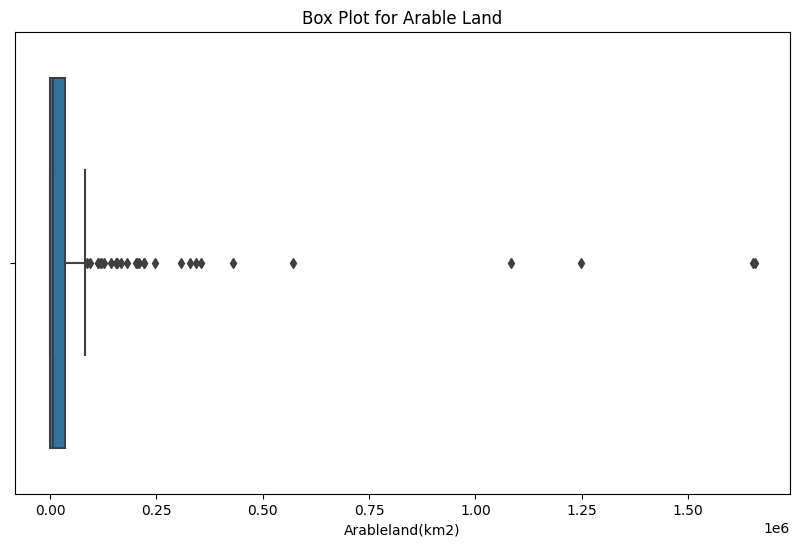

In [15]:
# Visualizing the distribution of the land resources can be helpful
column = 'Arableland(km2)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[column])
plt.title(f'Box Plot for Arable Land')
plt.show()

## 6.  Feature Relationships 

In [16]:
df_filtered = df.groupby('Country').filter(lambda x: x['Arableland(km2)'].sum() > 10000)
print(df_filtered.reset_index(drop=True))

                    Country  Cultivatedland(km2)  Arableland(km2)  \
0                     India            1765260.0        1656780.0   
1             United States            1681826.0        1652028.0   
2                    Russia            1265267.0        1248169.0   
3                     China            1238013.0        1084461.0   
4                    Brazil             800485.0         570572.0   
..                      ...                  ...              ...   
103             Netherlands              12824.0          12367.0   
104                  Latvia              12662.0          12016.0   
105                 Somalia              11479.0          11479.0   
106  Bosnia and Herzegovina              11110.0          10086.0   
107                 Ireland              10826.0          10826.0   

     Permanentcrops(km2)  Otherlands(km2)  Totalarea(km2)  
0               108479.0        1522002.0       3287263.0  
1                29798.0        8151691.0       983

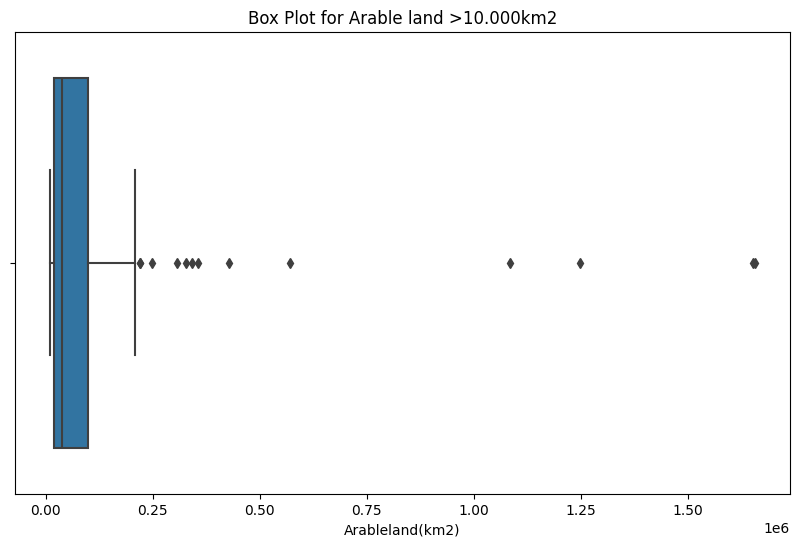

In [17]:
column = 'Arableland(km2)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered[column])
plt.title(f'Box Plot for Arable land >10.000km2')
plt.show()

In [18]:
df_filtered2 = df.groupby('Arableland(km2)').filter(lambda x: x['Arableland(km2)'].sum() > 100000)
print(df_filtered2)

            Country  Cultivatedland(km2)  Arableland(km2)  \
1             India            1765260.0        1656780.0   
2     United States            1681826.0        1652028.0   
3            Russia            1265267.0        1248169.0   
4             China            1238013.0        1084461.0   
5            Brazil             800485.0         570572.0   
6            Canada             519205.0         429355.0   
7         Australia             487695.0         307520.0   
8         Indonesia             478055.0         247598.0   
9           Nigeria             412938.0         354726.0   
10        Argentina             397598.0         328087.0   
11          Ukraine             347673.0         342901.0   
12            Sudan             296289.0         204710.0   
13           Mexico             259301.0         202229.0   
14       Kazakhstan             242516.0         221059.0   
15           Turkey             240553.0         209211.0   
16         Pakistan     

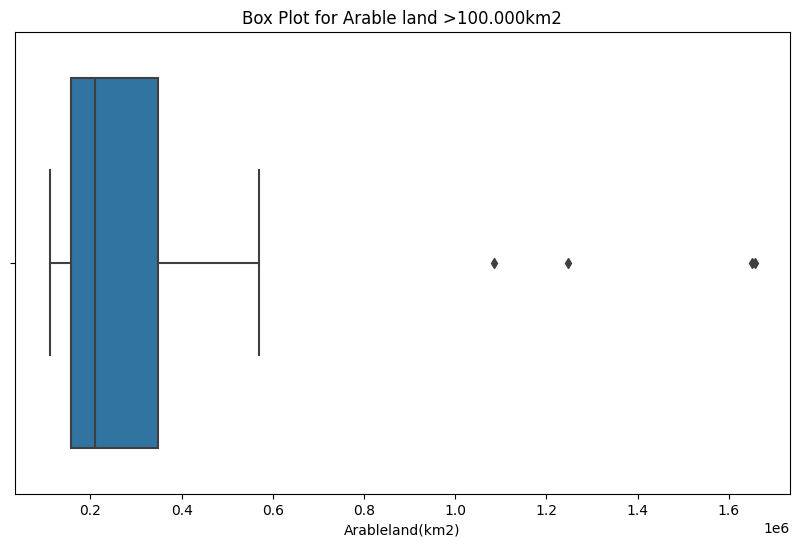

In [19]:
column = 'Arableland(km2)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered2[column])
plt.title(f'Box Plot for Arable land >100.000km2')
plt.show()

In [20]:
df_filtered3 = df.groupby('Country').filter(lambda x: x['Arableland(km2)'].sum() < 10000)
print(df_filtered3)

                         Country  Cultivatedland(km2)  Arableland(km2)  \
39                      Malaysia              73568.0           9567.0   
105           Dominican Republic              13000.0           8084.0   
111             Papua New Guinea              10182.0           3240.0   
112                   Tajikistan              10087.0           8790.0   
113                      Croatia               9905.0           9056.0   
..                           ...                  ...              ...   
232            Clipperton Island                  0.0              0.0   
233  Ashmore and Cartier Islands                  0.0              0.0   
234               Navassa Island                  0.0              0.0   
235                       Monaco                  0.0              0.0   
236                 Vatican City                  0.0              0.0   

     Permanentcrops(km2)  Otherlands(km2)  Totalarea(km2)  
39               64001.0        256279.00       329

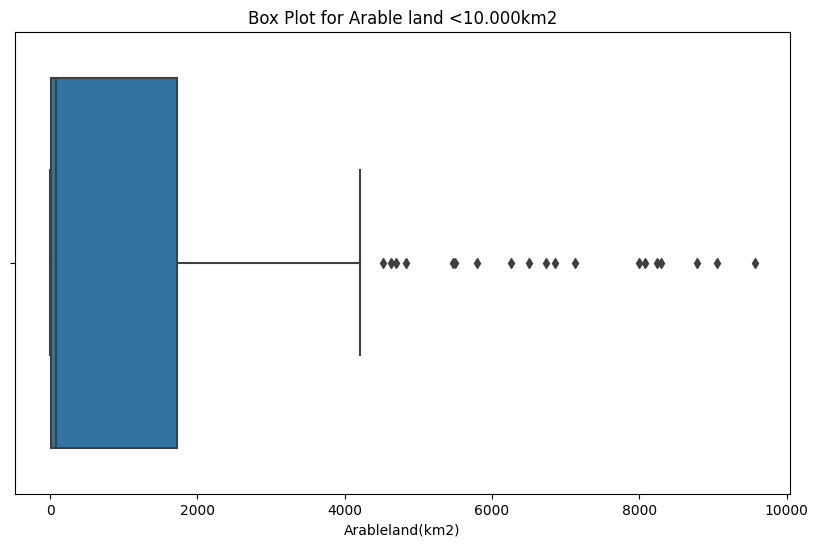

In [21]:
column = 'Arableland(km2)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered3[column])
plt.title(f'Box Plot for Arable land <10.000km2')
plt.show()


## 7. Filtering & Grouping Data

In [31]:
sorted_data_descending = df.sort_values(by='Arableland(km2)', ascending=False)
df_top30 = sorted_data_descending.head(30).reset_index(drop=True)

In [32]:
df_top30.describe()

,Cultivatedland(km2),Arableland(km2),Permanentcrops(km2),Otherlands(km2),Totalarea(km2)
count,3.000000e+01,3.000000e+01,30.000000,3.000000e+01,3.000000e+01
mean,4.245915e+05,3.699112e+05,34899.266667,2.582426e+06,3.007423e+06
std,4.605523e+05,4.391366e+05,50309.237399,3.796531e+06,4.114762e+06
min,9.726800e+04,8.291700e+04,0.000000,5.119200e+04,1.484600e+05
25%,1.562890e+05,1.300745e+05,7796.250000,3.544465e+05,6.136128e+05
50%,2.341195e+05,2.034695e+05,15991.500000,1.009526e+06,1.161695e+06
75%,4.617758e+05,3.391975e+05,41700.250000,2.213370e+06,2.766525e+06
max,1.765260e+06,1.656780e+06,230457.000000,1.583298e+07,1.709824e+07


In [33]:
df_top30.head(10)

,Country,Cultivatedland(km2),Arableland(km2),Permanentcrops(km2),Otherlands(km2),Totalarea(km2)
0,India,1765260.0,1656780.0,108479.0,1522002.0,3287263.0
1,United States,1681826.0,1652028.0,29798.0,8151691.0,9833517.0
2,Russia,1265267.0,1248169.0,17098.0,15832975.0,17098242.0
3,China,1238013.0,1084461.0,153552.0,8358947.0,9596960.0
4,Brazil,800485.0,570572.0,68126.0,7715285.0,8515770.0
5,Canada,519205.0,429355.0,49924.0,9465465.0,9984670.0
6,Nigeria,412938.0,354726.0,68361.0,510830.0,923768.0
7,Ukraine,347673.0,342901.0,9054.0,255877.0,603550.0
8,Argentina,397598.0,328087.0,11122.0,2382802.0,2780400.0
9,Australia,487695.0,307520.0,7741.0,7253525.0,7741220.0


In [34]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                     Cultivatedland(km2)  Arableland(km2)  \
Cultivatedland(km2)             1.000000         0.992904   
Arableland(km2)                 0.992904         1.000000   
Permanentcrops(km2)             0.601657         0.530348   
Otherlands(km2)                 0.644347         0.630933   
Totalarea(km2)                  0.705334         0.692136   

                     Permanentcrops(km2)  Otherlands(km2)  Totalarea(km2)  
Cultivatedland(km2)             0.601657         0.644347        0.705334  
Arableland(km2)                 0.530348         0.630933        0.692136  
Permanentcrops(km2)             1.000000         0.304927        0.347511  
Otherlands(km2)                 0.304927         1.000000        0.996385  
Totalarea(km2)                  0.347511         0.996385        1.000000  


<Axes: >

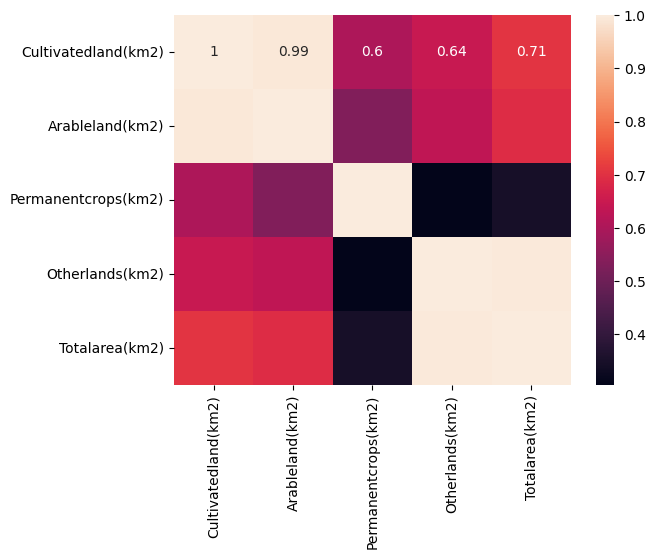

In [35]:
sns.heatmap(correlation_matrix, annot=True)

Text(0.5, 0, 'Area (km2)')

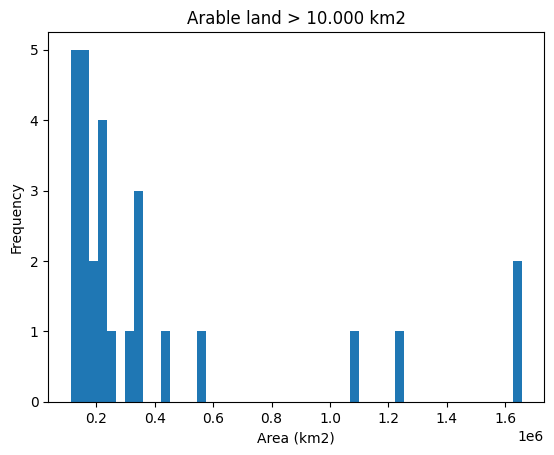

In [36]:
# We can use a histogram to explore the distribution of countries with arable land areas exceeding 10.000km2
ax = df_filtered2['Arableland(km2)'].plot(kind='hist',
                          bins=50,
                          title='Arable land > 10.000 km2')
ax.set_xlabel('Area (km2)')

<function matplotlib.pyplot.show(close=None, block=None)>

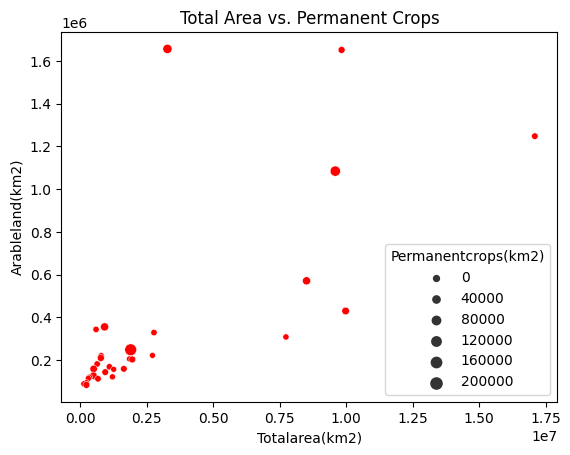

In [38]:
ax = sns.scatterplot(x='Totalarea(km2)', y='Arableland(km2)', color='red', size= 'Permanentcrops(km2)', data=df_top30)
ax.set_title('Total Area vs. Permanent Crops')
plt.show

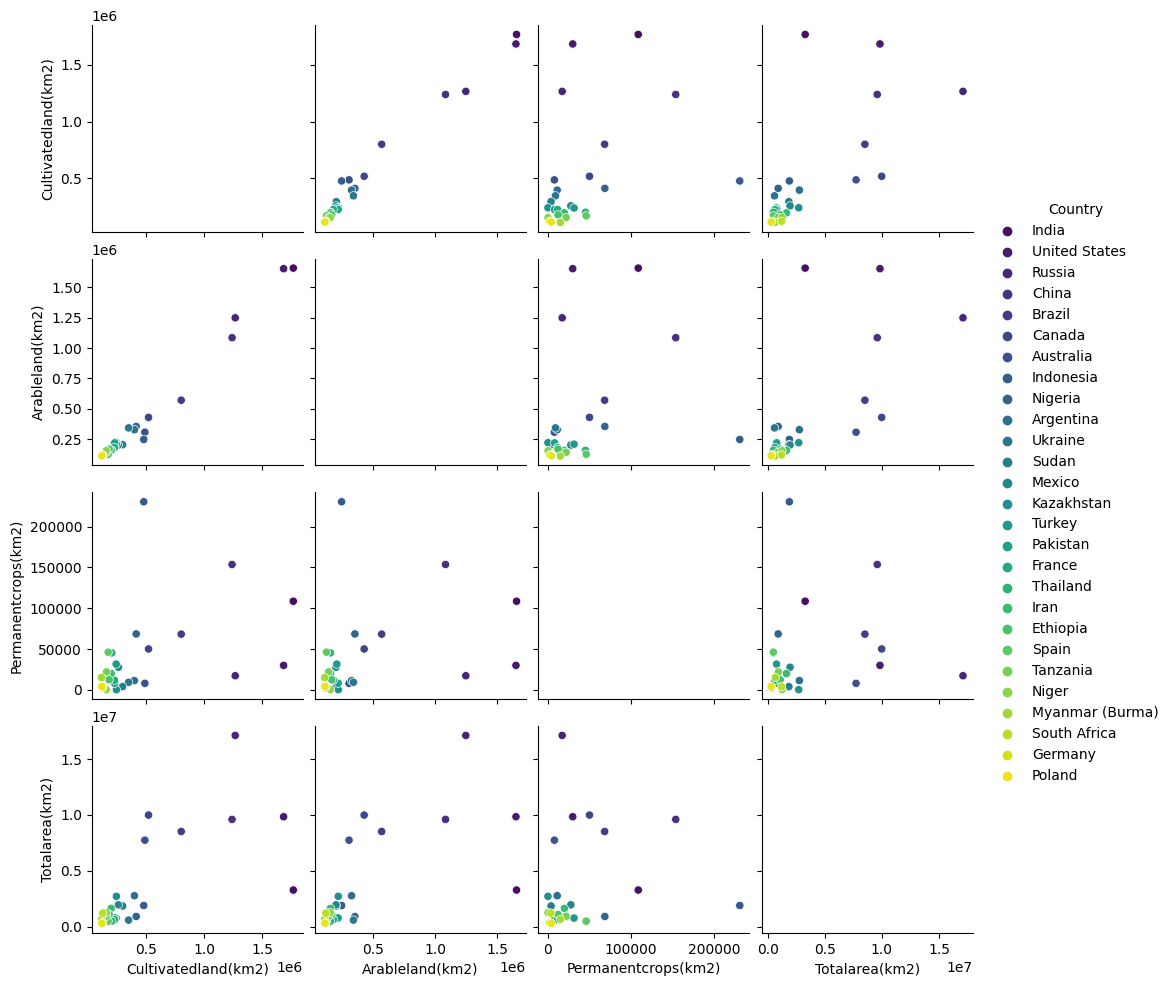

In [39]:
sns.pairplot(df_filtered2,
             vars=['Cultivatedland(km2)', 'Arableland(km2)',
       'Permanentcrops(km2)', 'Totalarea(km2)'],
            hue = 'Country', palette= 'viridis')
plt.show()

In [40]:
df.to_csv('land_cultivation.csv', index=False)

# Citation
Wikipedia contributors. "Land use statistics by country." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 8 Mar. 2023. Web. 15 Nov. 2023.